In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from patsy import dmatrices
from pandas import Series
from matplotlib import pyplot
from datetime import datetime
from matplotlib.pyplot import figure

1.	The quarterly gross domestic product series shown below has which components of a time series?

a.	Trend only

b.	Seasonality only

c.	Both Trend and seasonality

d.	None can be identifiable

Ans: c

2.	If a quarterly time series has additive seasonality, then find out the missing value

Q1	Q2	Q3	Q4
25	-5	30	10

Ans: Q3 is -30

In [2]:
wine = pd.read_csv('AusWineSales.csv')
wine.head()

,YearMonth,Red,Sparkling,Sweetwhite
0,1980-01,464,1686,85
1,1980-02,675,1591,89
2,1980-03,703,2304,109
3,1980-04,887,1712,95
4,1980-05,1139,1471,91


In [3]:
wine.tail(10)

,YearMonth,Red,Sparkling,Sweetwhite
177,1994-10,2226,3385,254
178,1994-11,2586,3729,275
179,1994-12,2684,5999,394
180,1995-01,1185,1070,159
181,1995-02,1749,1402,230
182,1995-03,2459,1897,188
183,1995-04,2618,1862,195
184,1995-05,2585,1670,189
185,1995-06,3310,1688,220
186,1995-07,3923,2031,274


In [4]:
wine.isnull().sum()

YearMonth     0
Red           0
Sparkling     0
Sweetwhite    0
dtype: int64

In [5]:
wine.shape

(187, 4)

In [6]:
date_rng = pd.date_range(start='1/1/1980', end='31/7/1995', freq='M')
date_rng

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
len(date_rng)

187

In [8]:
wine['TimeIndex'] = pd.DataFrame(date_rng, columns=['Year'])
wine.head(8)

,YearMonth,Red,Sparkling,Sweetwhite,TimeIndex
0,1980-01,464,1686,85,1980-01-31
1,1980-02,675,1591,89,1980-02-29
2,1980-03,703,2304,109,1980-03-31
3,1980-04,887,1712,95,1980-04-30
4,1980-05,1139,1471,91,1980-05-31
5,1980-06,1077,1377,95,1980-06-30
6,1980-07,1318,1966,96,1980-07-31
7,1980-08,1260,2453,128,1980-08-31


In [9]:
import calendar
wine['Month'] = date_rng.month
wine['Month'] = wine['Month'].apply(lambda x: calendar.month_abbr[x])
wine['Year'] = date_rng.year

In [10]:
wine

,YearMonth,Red,Sparkling,Sweetwhite,TimeIndex,Month,Year
0,1980-01,464,1686,85,1980-01-31,Jan,1980
1,1980-02,675,1591,89,1980-02-29,Feb,1980
2,1980-03,703,2304,109,1980-03-31,Mar,1980
3,1980-04,887,1712,95,1980-04-30,Apr,1980
4,1980-05,1139,1471,91,1980-05-31,May,1980
5,1980-06,1077,1377,95,1980-06-30,Jun,1980
6,1980-07,1318,1966,96,1980-07-31,Jul,1980
7,1980-08,1260,2453,128,1980-08-31,Aug,1980
8,1980-09,1120,1984,124,1980-09-30,Sep,1980
9,1980-10,963,2596,111,1980-10-31,Oct,1980


In [11]:
wine.set_index(date_rng, inplace=True)

In [12]:
wine = wine.drop(['YearMonth','TimeIndex'],axis = 1)
wine.head()

,Red,Sparkling,Sweetwhite,Month,Year
1980-01-31,464,1686,85,Jan,1980
1980-02-29,675,1591,89,Feb,1980
1980-03-31,703,2304,109,Mar,1980
1980-04-30,887,1712,95,Apr,1980
1980-05-31,1139,1471,91,May,1980


In [13]:
sales_sw = wine['Sweetwhite']
sales_sw

1980-01-31     85
1980-02-29     89
1980-03-31    109
1980-04-30     95
1980-05-31     91
1980-06-30     95
1980-07-31     96
1980-08-31    128
1980-09-30    124
1980-10-31    111
1980-11-30    178
1980-12-31    140
1981-01-31    150
1981-02-28    132
1981-03-31    155
1981-04-30    132
1981-05-31     91
1981-06-30     94
1981-07-31    109
1981-08-31    155
1981-09-30    123
1981-10-31    130
1981-11-30    150
1981-12-31    163
1982-01-31    101
1982-02-28    123
1982-03-31    127
1982-04-30    112
1982-05-31    108
1982-06-30    116
             ... 
1993-02-28    217
1993-03-31    227
1993-04-30    242
1993-05-31    185
1993-06-30    175
1993-07-31    252
1993-08-31    319
1993-09-30    202
1993-10-31    254
1993-11-30    336
1993-12-31    431
1994-01-31    150
1994-02-28    280
1994-03-31    187
1994-04-30    279
1994-05-31    193
1994-06-30    227
1994-07-31    225
1994-08-31    205
1994-09-30    259
1994-10-31    254
1994-11-30    275
1994-12-31    394
1995-01-31    159
1995-02-28

Text(0,0.5,'Sweet_white Sales')

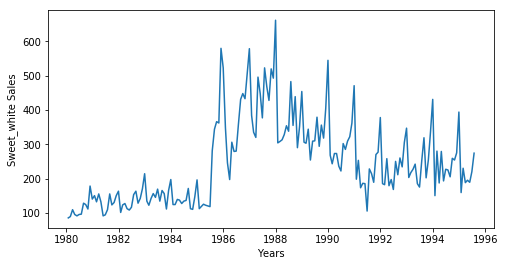

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(sales_sw)
plt.xlabel('Years')
plt.ylabel('Sweet_white Sales')

Text(0.5,1,'Rolling Mean')

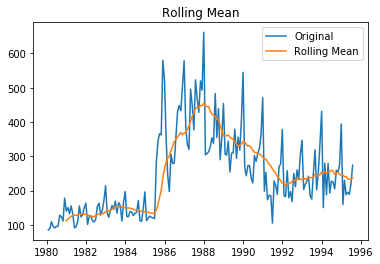

In [15]:
rolmean = sales_sw.rolling(window=12).mean()
orig = plt.plot(sales_sw, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')

Text(0.5,1,'Rolling Mean')

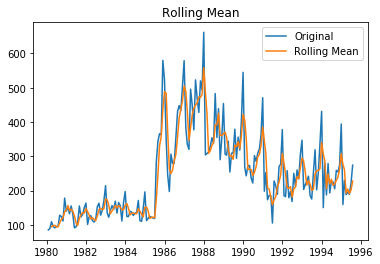

In [16]:
rolmean = sales_sw.rolling(window=3).mean()
orig = plt.plot(sales_sw, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')

Text(0.5,1,'Rolling Mean')

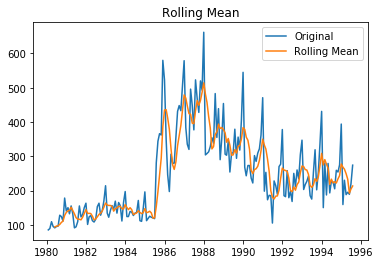

In [17]:
rolmean = sales_sw.rolling(window=5).mean()
orig = plt.plot(sales_sw, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')

Text(0.5,1,'Rolling Mean')

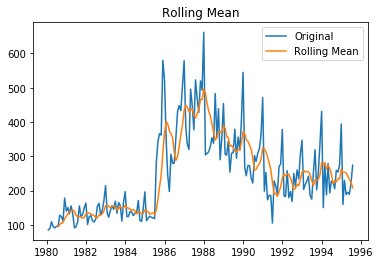

In [18]:
rolmean = sales_sw.rolling(window=7).mean()
orig = plt.plot(sales_sw, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')

In [19]:
wine.head()

,Red,Sparkling,Sweetwhite,Month,Year
1980-01-31,464,1686,85,Jan,1980
1980-02-29,675,1591,89,Feb,1980
1980-03-31,703,2304,109,Mar,1980
1980-04-30,887,1712,95,Apr,1980
1980-05-31,1139,1471,91,May,1980


In [20]:
monthly_sales_sparkling = pd.pivot_table(wine, values = "Sparkling", columns = "Month", index = "Year")
monthly_sales_sparkling = monthly_sales_sparkling[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
monthly_sales_sparkling

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


<Figure size 2880x720 with 0 Axes>

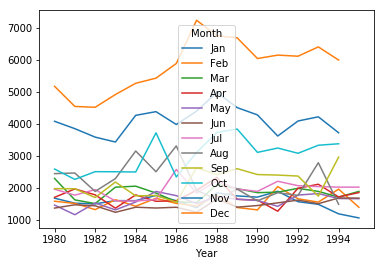

In [21]:
plt.figure(figsize=(40,10))
monthly_sales_sparkling.plot();

For sparkling sales data, we can see that the December month has highest sales for every year. Here, we see that every **month**, the sales are fluctuating up and down, and also as the year progresses, there is no much difference in sales from year to year, meaning we can see that the sales for every **year** is not following an increasing trend this means the sales of 1982 is more or less same as 1983 and so on it is the same.

In [22]:
monthly_sales_red = pd.pivot_table(wine, values = "Red", columns = "Month", index = "Year")
monthly_sales_red = monthly_sales_red[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
monthly_sales_red

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,464.0,675.0,703.0,887.0,1139.0,1077.0,1318.0,1260.0,1120.0,963.0,996.0,960.0
1981,530.0,883.0,894.0,1045.0,1199.0,1287.0,1565.0,1577.0,1076.0,918.0,1008.0,1063.0
1982,544.0,635.0,804.0,980.0,1018.0,1064.0,1404.0,1286.0,1104.0,999.0,996.0,1015.0
1983,615.0,722.0,832.0,977.0,1270.0,1437.0,1520.0,1708.0,1151.0,934.0,1159.0,1209.0
1984,699.0,830.0,996.0,1124.0,1458.0,1270.0,1753.0,2258.0,1208.0,1241.0,1265.0,1828.0
1985,809.0,997.0,1164.0,1205.0,1538.0,1513.0,1378.0,2083.0,1357.0,1536.0,1526.0,1376.0
1986,779.0,1005.0,1193.0,1522.0,1539.0,1546.0,2116.0,2326.0,1596.0,1356.0,1553.0,1613.0
1987,814.0,1150.0,1225.0,1691.0,1759.0,1754.0,2100.0,2062.0,2012.0,1897.0,1964.0,2186.0
1988,966.0,1549.0,1538.0,1612.0,2078.0,2137.0,2907.0,2249.0,1883.0,1739.0,1828.0,1868.0


<Figure size 2880x720 with 0 Axes>

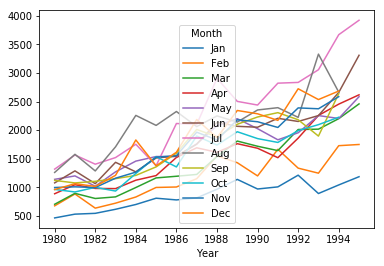

In [23]:
plt.figure(figsize=(40,10))
monthly_sales_red.plot();

For Red wine sales data, we can see that as year progresses, the sales for July month is increasing and in 1995 it has the highest sales than any month of any year. Also, we can see that, the sales for every month is following an increasing trend, i.e., same month every year has seen an increase in sales, yes there are fluctuations every month but it has not fallen down below the lowest sales in their respective years. January is performing very poor compared to other months every year.

The main difference between the sales of above two is the **Seasonality**.

The sparkling white data has an **additive seasonality** and the red wine sales has a **multiplicative seasonality**.This can be interpreted from the above plots.

For Sparkling white sales series, we can see that the plot for every month are not diverging at all, they are on the same level(**no increasing trend in the monthly plot**).

For Red wine series, the monthly sales are increasing every year(**monthly plot follows an increasing trend**)  so we got a diverging plot for red wine series.


# Decompostion and Trend for Sparkling White Sales

Text(0,0.5,'Sparkling Sales')

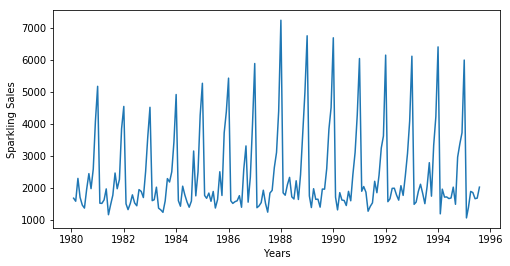

In [24]:
plt.figure(figsize=(8, 4))
plt.plot(wine.Sparkling)
plt.xlabel('Years')
plt.ylabel('Sparkling Sales')

In [25]:
import statsmodels.api as sm

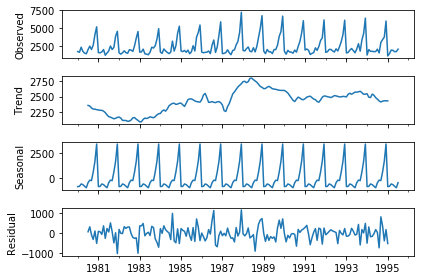

In [26]:
decomp_sparkling = sm.tsa.seasonal_decompose(wine.Sparkling, model="additive", freq=12)
decomp_sparkling.plot()
plt.show()

In [27]:
seasonal = decomp_sparkling.seasonal
seasonal

1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
1981-01-31    -854.260599
1981-02-28    -830.350678
1981-03-31    -592.356630
1981-04-30    -658.490559
1981-05-31    -824.416154
1981-06-30    -967.434011
1981-07-31    -465.502265
1981-08-31    -214.332821
1981-09-30    -254.677265
1981-10-31     599.769957
1981-11-30    1675.067179
1981-12-31    3386.983846
1982-01-31    -854.260599
1982-02-28    -830.350678
1982-03-31    -592.356630
1982-04-30    -658.490559
1982-05-31    -824.416154
1982-06-30    -967.434011
                 ...     
1993-02-28    -830.350678
1993-03-31    -592.356630
1993-04-30    -658.490559
1993-05-31    -824.416154
1993-06-30    -967.434011
1993-07-31    -465.502265
1993-08-31    -214.332821
1993-09-30  

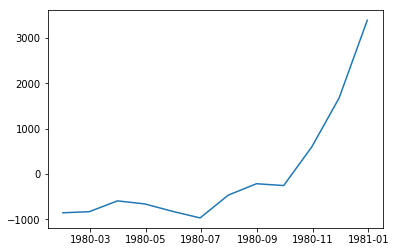

In [28]:
plt.plot(seasonal[:12])
plt.show()

# Decomposition and Trend for Red Wine Sales

Text(0,0.5,'Red Sales')

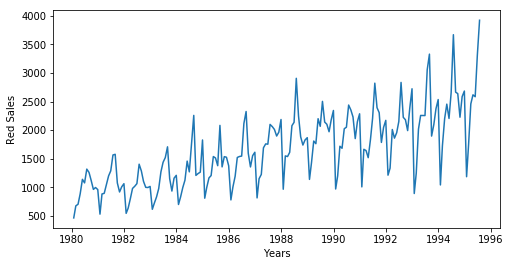

In [29]:
plt.figure(figsize=(8, 4))
plt.plot(wine.Red)
plt.xlabel('Years')
plt.ylabel('Red Sales')

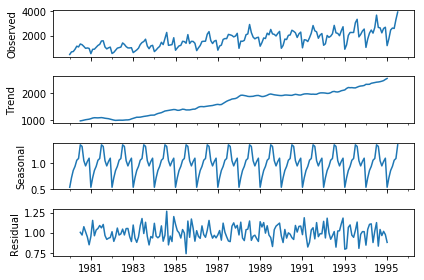

In [30]:
decomp_red = sm.tsa.seasonal_decompose(wine.Red, model="multiplicative", freq=12)
decomp_red.plot()
plt.show()

In [31]:
seasonal = decomp_red.seasonal
seasonal

1980-01-31    0.529999
1980-02-29    0.714783
1980-03-31    0.858170
1980-04-30    0.937106
1980-05-31    1.057188
1980-06-30    1.091452
1980-07-31    1.357717
1980-08-31    1.327320
1980-09-30    1.048592
1980-10-31    0.946558
1980-11-30    1.033627
1980-12-31    1.097489
1981-01-31    0.529999
1981-02-28    0.714783
1981-03-31    0.858170
1981-04-30    0.937106
1981-05-31    1.057188
1981-06-30    1.091452
1981-07-31    1.357717
1981-08-31    1.327320
1981-09-30    1.048592
1981-10-31    0.946558
1981-11-30    1.033627
1981-12-31    1.097489
1982-01-31    0.529999
1982-02-28    0.714783
1982-03-31    0.858170
1982-04-30    0.937106
1982-05-31    1.057188
1982-06-30    1.091452
                ...   
1993-02-28    0.714783
1993-03-31    0.858170
1993-04-30    0.937106
1993-05-31    1.057188
1993-06-30    1.091452
1993-07-31    1.357717
1993-08-31    1.327320
1993-09-30    1.048592
1993-10-31    0.946558
1993-11-30    1.033627
1993-12-31    1.097489
1994-01-31    0.529999
1994-02-28 

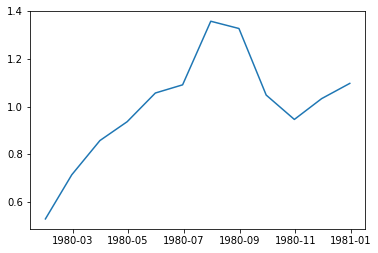

In [32]:
plt.plot(seasonal[:12])
plt.show()

# Forecasting for Sparkling Wine Sales data

**We already know that it has Additive seasonality and the trend is not seen much.**

# We are fitting Holt-Winters Modeling Technique

In [33]:
wine

,Red,Sparkling,Sweetwhite,Month,Year
1980-01-31,464,1686,85,Jan,1980
1980-02-29,675,1591,89,Feb,1980
1980-03-31,703,2304,109,Mar,1980
1980-04-30,887,1712,95,Apr,1980
1980-05-31,1139,1471,91,May,1980
1980-06-30,1077,1377,95,Jun,1980
1980-07-31,1318,1966,96,Jul,1980
1980-08-31,1260,2453,128,Aug,1980
1980-09-30,1120,1984,124,Sep,1980
1980-10-31,963,2596,111,Oct,1980


In [34]:
spark = wine.loc[:,['Sparkling','Month','Year']]
spark

,Sparkling,Month,Year
1980-01-31,1686,Jan,1980
1980-02-29,1591,Feb,1980
1980-03-31,2304,Mar,1980
1980-04-30,1712,Apr,1980
1980-05-31,1471,May,1980
1980-06-30,1377,Jun,1980
1980-07-31,1966,Jul,1980
1980-08-31,2453,Aug,1980
1980-09-30,1984,Sep,1980
1980-10-31,2596,Oct,1980


In [35]:
spark.tail()

,Sparkling,Month,Year
1995-03-31,1897,Mar,1995
1995-04-30,1862,Apr,1995
1995-05-31,1670,May,1995
1995-06-30,1688,Jun,1995
1995-07-31,2031,Jul,1995


In [36]:
train = spark.iloc[0:168,:1]
train

,Sparkling
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471
1980-06-30,1377
1980-07-31,1966
1980-08-31,2453
1980-09-30,1984
1980-10-31,2596


In [37]:
train_diff = train.diff(periods=1)

In [38]:
test = spark.iloc[168:,:1]
test

,Sparkling
1994-01-31,1197
1994-02-28,1968
1994-03-31,1720
1994-04-30,1725
1994-05-31,1674
1994-06-30,1693
1994-07-31,2031
1994-08-31,1495
1994-09-30,2968
1994-10-31,3385


In [39]:
len(test)

19

In [40]:
spark

,Sparkling,Month,Year
1980-01-31,1686,Jan,1980
1980-02-29,1591,Feb,1980
1980-03-31,2304,Mar,1980
1980-04-30,1712,Apr,1980
1980-05-31,1471,May,1980
1980-06-30,1377,Jun,1980
1980-07-31,1966,Jul,1980
1980-08-31,2453,Aug,1980
1980-09-30,1984,Sep,1980
1980-10-31,2596,Oct,1980


In [41]:
train = spark.iloc[:168,:]
train.tail()

,Sparkling,Month,Year
1993-08-31,2795,Aug,1993
1993-09-30,1749,Sep,1993
1993-10-31,3339,Oct,1993
1993-11-30,4227,Nov,1993
1993-12-31,6410,Dec,1993


In [42]:
test = spark.iloc[168:,:]
test.head()

,Sparkling,Month,Year
1994-01-31,1197,Jan,1994
1994-02-28,1968,Feb,1994
1994-03-31,1720,Mar,1994
1994-04-30,1725,Apr,1994
1994-05-31,1674,May,1994


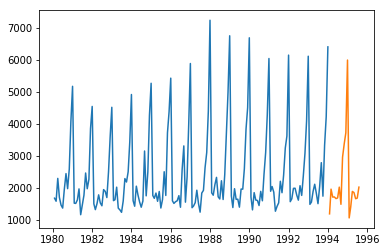

In [43]:
plt.plot(train.Sparkling)
plt.plot(test.Sparkling)
pyplot.show()

In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

In [45]:
model1_fit=ExponentialSmoothing(np.asarray(train['Sparkling']), seasonal_periods=12 ,trend = 'add', seasonal='add').fit(optimized=True)

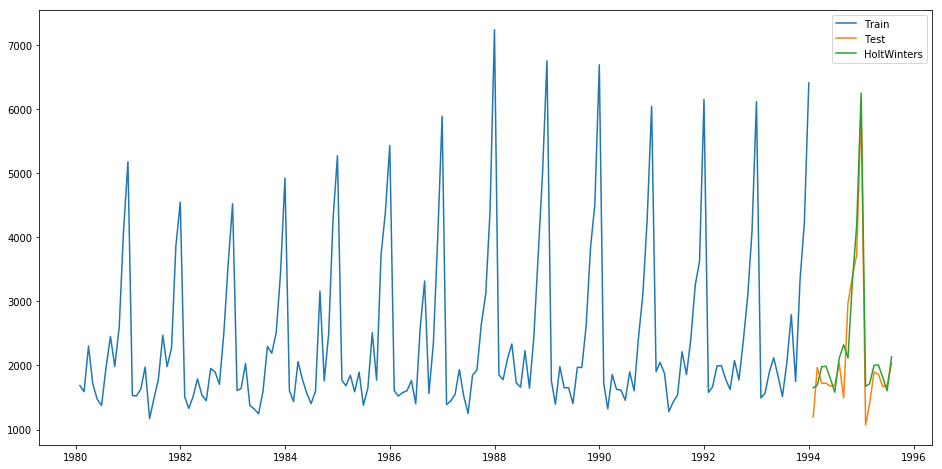

In [46]:
fcst_HoltW = test.copy()
fcst_HoltW['HoltW'] = model1_fit.forecast(len(test['Sparkling']))
plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(fcst_HoltW['HoltW'], label='HoltWinters')
plt.legend(loc='best')

In [47]:
model1_fit.model.params

{'smoothing_level': 0.05263157894736842,
 'smoothing_slope': 0.05263157894736842,
 'smoothing_seasonal': 0.47368421052631576,
 'damping_slope': nan,
 'initial_level': 1643.7857142857142,
 'initial_slope': 0.0,
 'initial_seasons': array([  42.21428571,  -52.78571429,  660.21428571,   68.21428571,
        -172.78571429, -266.78571429,  322.21428571,  809.21428571,
         340.21428571,  952.21428571, 2443.21428571, 3535.21428571]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [48]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [49]:
mean_absolute_percentage_error(test['Sparkling'],fcst_HoltW['HoltW'])

16.47909101757728

We are using Exponential smoothing and we are initially we dont know the parameters, so we are intialising the optimised as True, so the computer checks for the parameter values.

This values may or may not be the best parameter values for the model.

# Original Parameters(optimised = True)
So we got alpha(level) = 0.0526, beta(trend) = 0.0526, and gamma(seasonal) = 0.4736

Now we check for the best parameters by changing the values of above.

# New Model

In [50]:
model2_fit=ExponentialSmoothing(np.asarray(train['Sparkling']), seasonal_periods=12 ,trend = 'add', seasonal='add').fit(smoothing_slope = 0.01, smoothing_seasonal=0.5, smoothing_level = 0.1 ,optimized=False)

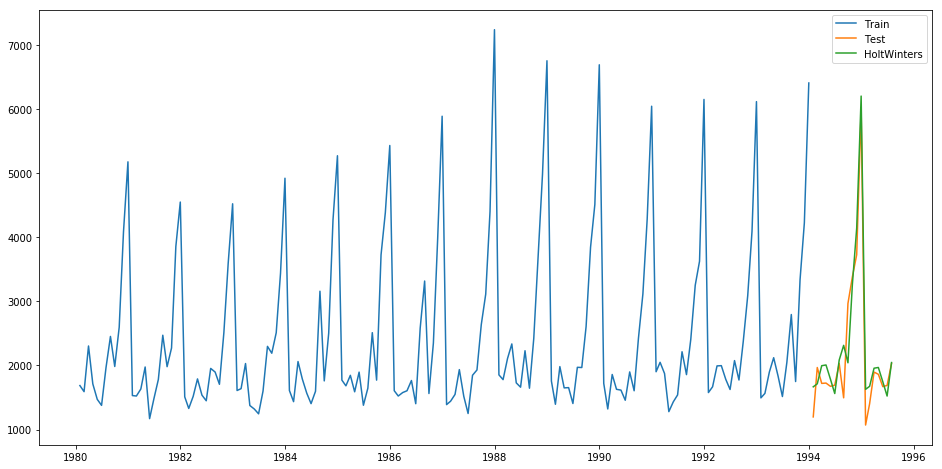

In [51]:
fcst_HoltW = test.copy()
fcst_HoltW['HoltW'] = model2_fit.forecast(len(test['Sparkling']))
plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(fcst_HoltW['HoltW'], label='HoltWinters')
plt.legend(loc='best')

In [52]:
mean_absolute_percentage_error(test['Sparkling'],fcst_HoltW['HoltW'])

15.847989939937165

Now by changing the smoothing parameters(alpha, beta, gamma) we are getting a MAPE of 15.847 % which is less compared to previous model(original parameters)

# New values for parameters are:

# smoothing_level(aplha) = 0.1
# smoothing_slope(trend) = 0.01
# smoothing_seasonal(seasonality) = 0.5

In [53]:
model_spark_Full_fit = ExponentialSmoothing(np.asarray(spark['Sparkling']),seasonal_periods = 12,
trend = 'add',seasonal='add').fit(smoothing_slope = 0.01, smoothing_seasonal=0.5, smoothing_level = 0.1 , optimized=False)

# Forecasted values

In [54]:
model_spark_Full_fit.forecast(12)

array([1813.41198834, 2451.98195516, 3220.99150366, 3822.90034904,
       6053.94829728, 1149.03558295, 1543.46196051, 1808.09389984,
       1790.83605541, 1625.93830037, 1582.31213506, 1920.03582999])